In [1]:
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import os, sys, pickle
from copy import deepcopy
import jp_analysis as analysis

In [2]:
import jp_mpl as jplot

### Loading the experimental data of SNO+

In [4]:
data_dir = '/home/jpyanez/snoplus/data/SOC_files_reflections/'
run_nr = '102574'
all_files = os.listdir(data_dir)
file_list = [os.path.join(data_dir,x) for x in all_files if (run_nr in x and 'pckl' in x)]

In [5]:
for iFile in range(len(file_list)):
    tmp_data = pickle.load(open(file_list[iFile]))
    if iFile == 0:
        data = deepcopy(tmp_data)
    else:
        data['toa_map']+= tmp_data['toa_map']

In [7]:
print data['time_edges']

[ 330.   330.5  331.   331.5  332.   332.5  333.   333.5  334.   334.5
  335.   335.5  336.   336.5  337.   337.5  338.   338.5  339.   339.5
  340.   340.5  341.   341.5  342.   342.5  343.   343.5  344.   344.5
  345.   345.5  346.   346.5  347.   347.5  348.   348.5  349.   349.5
  350.   350.5  351.   351.5  352.   352.5  353.   353.5  354.   354.5
  355.   355.5  356.   356.5  357.   357.5  358.   358.5  359.   359.5
  360.   360.5  361.   361.5  362.   362.5  363.   363.5  364.   364.5
  365.   365.5  366.   366.5  367.   367.5  368.   368.5  369.   369.5
  370.   370.5  371.   371.5  372.   372.5  373.   373.5  374.   374.5
  375.   375.5  376.   376.5  377.   377.5  378.   378.5  379.   379.5
  380.   380.5  381.   381.5  382.   382.5  383.   383.5  384.   384.5
  385.   385.5  386.   386.5  387.   387.5  388.   388.5  389.   389.5
  390.   390.5  391.   391.5  392.   392.5  393.   393.5  394.   394.5
  395.   395.5  396.   396.5  397.   397.5  398.   398.5  399.   399.5
  400.

/gs/software/CentOS-6/eb/software/Toolchain/iomkl/2015b/IPython/3.2.1-Python-2.7.10/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


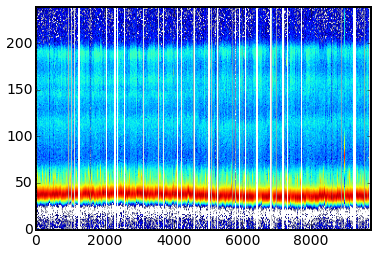

In [6]:
plt.imshow(np.log10(data['toa_map'].T), aspect='auto', origin='lower')

### Loading the experimental data of SNO

In [6]:
snodata = pickle.load(open('/home/jpyanez/snoplus/data/sno_data/laserball/420_center.pckl'))

/gs/software/CentOS-6/eb/software/Toolchain/iomkl/2015b/IPython/3.2.1-Python-2.7.10/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: RuntimeWarning: divide by zero encountered in log10


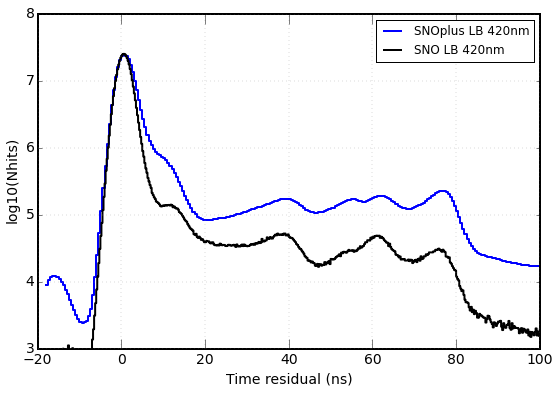

In [7]:
plt.figure(figsize=(9,6))
tdelay = 348
snoscale=1.36
jplot.unfilledBar(data['time_edges']-tdelay, np.log10(data['toa_map'].sum(axis=0)), 
                  label='SNOplus LB 420nm', color = 'blue')
jplot.unfilledBar(snodata['time_edges'][0], np.log10(snodata['toa_map'][0])*snoscale, 
                  label='SNO LB 420nm', color = 'black')
plt.xlim([-20, 100])
plt.ylim([3, 8])
plt.legend(loc=0)
plt.xlabel('Time residual (ns)')
plt.ylabel('log10(Nhits)')

### Loading the MC with GreyDisc

In [3]:
gdisc_dir = '/home/jpyanez/snoplus/rundir/laserball_greydisc/z0_baseline'
all_files = os.listdir(gdisc_dir)
file_list = [os.path.join(gdisc_dir,x) for x in all_files if  'pckl' in x]

In [9]:
for iFile in range(len(file_list)):
    try:
        tmp_data = pickle.load(open(file_list[iFile]))
    except:
        print file_list[iFile]
        continue
    if iFile == 0:
        gdisc = deepcopy(tmp_data)
    else:
        gdisc['toa_map']+= tmp_data['toa_map']

/gs/software/CentOS-6/eb/software/Toolchain/iomkl/2015b/IPython/3.2.1-Python-2.7.10/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


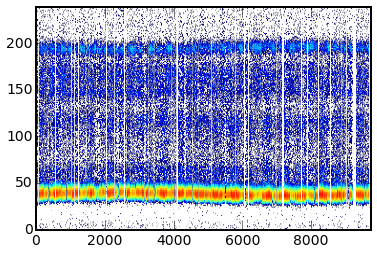

In [10]:
plt.imshow(np.log10(gdisc['toa_map'].T), aspect='auto', origin='lower')

### Loading MC with 3D PMT

In [29]:
pmt_dir = '/home/jpyanez/snoplus/rundir/laserball_greydisc/z0_baseline_3d'
all_files = os.listdir(pmt_dir)
file_list = [os.path.join(pmt_dir,x) for x in all_files if  'pckl' in x]

/home/jpyanez/snoplus/rundir/laserball_greydisc/z0_baseline_3d/file2_TOA.pckl
/home/jpyanez/snoplus/rundir/laserball_greydisc/z0_baseline_3d/file3_TOA.pckl
/home/jpyanez/snoplus/rundir/laserball_greydisc/z0_baseline_3d/file4_TOA.pckl
/home/jpyanez/snoplus/rundir/laserball_greydisc/z0_baseline_3d/file5_TOA.pckl
/home/jpyanez/snoplus/rundir/laserball_greydisc/z0_baseline_3d/file7_TOA.pckl
/home/jpyanez/snoplus/rundir/laserball_greydisc/z0_baseline_3d/file8_TOA.pckl
/home/jpyanez/snoplus/rundir/laserball_greydisc/z0_baseline_3d/file9_TOA.pckl


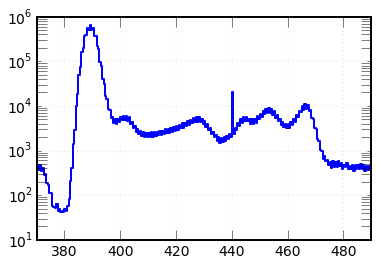

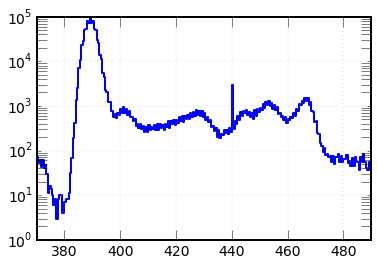

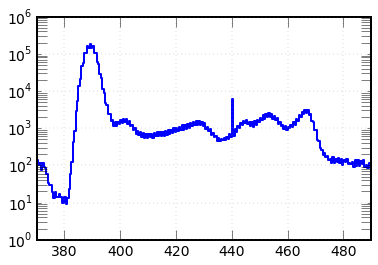

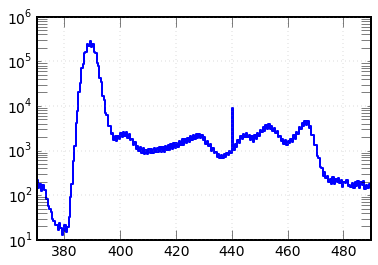

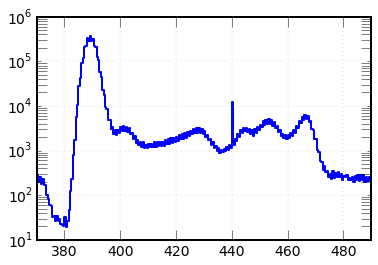

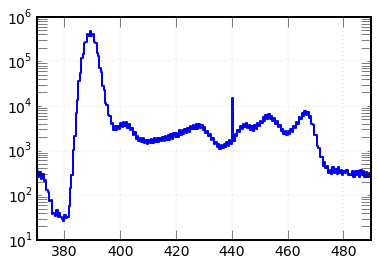

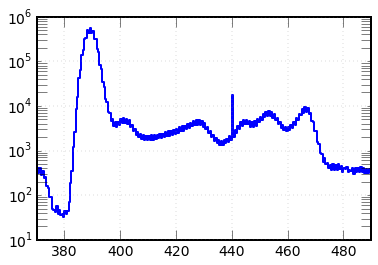

In [45]:
for iFile in range(len(file_list)):
    try:
        tmp_data = pickle.load(open(file_list[iFile]))
    except:
        print file_list[iFile]
        continue
    plt.figure()
    print file_list[iFile]
    jplot.unfilledBar(pmt['time_edges'],pmt['toa_map'].sum(axis=0))
    plt.yscale('log')
    if iFile == 0:
        pmt = deepcopy(tmp_data)
    else:
        pmt['toa_map']+= tmp_data['toa_map']
plt.yscale('log')

/gs/software/CentOS-6/eb/software/Toolchain/iomkl/2015b/IPython/3.2.1-Python-2.7.10/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


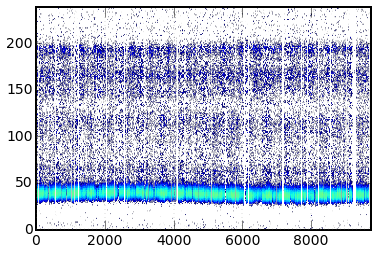

In [32]:
plt.imshow(np.log10(pmt['toa_map'].T), aspect='auto', origin='lower')

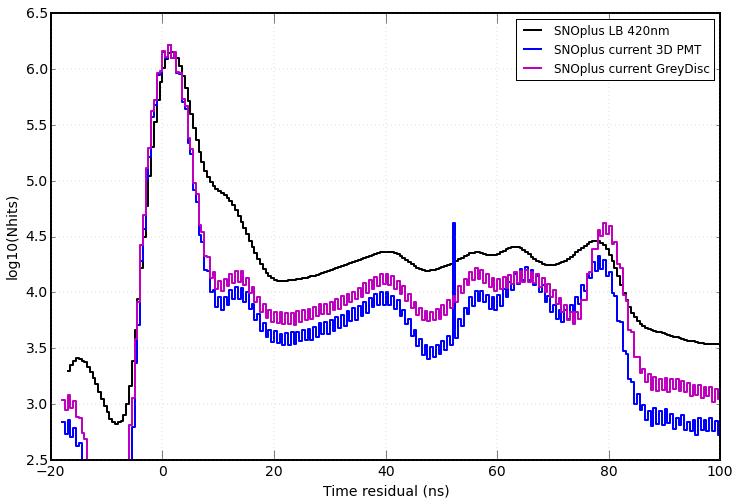

In [48]:
plt.figure(figsize=(12,8))
tdelay = 347
tdelay2 = 388
scale = 1.2
scale2 = 1.07
jplot.unfilledBar(data['time_edges']-tdelay, np.log10(data['toa_map'].sum(axis=0))/scale, 
                  label='SNOplus LB 420nm', color = 'black')


jplot.unfilledBar(pmt['time_edges']-tdelay2, np.log10(pmt['toa_map'].sum(axis=0))*scale2, 
                 color = 'blue', label = 'SNOplus current 3D PMT')

jplot.unfilledBar(gdisc['time_edges']-tdelay2, np.log10(gdisc['toa_map'].sum(axis=0)), 
                 color = 'm', label = 'SNOplus current GreyDisc')
plt.xlim([-20, 100])
plt.ylim([2.5, 6.5])
plt.legend(loc=0)
plt.xlabel('Time residual (ns)')
plt.ylabel('log10(Nhits)')

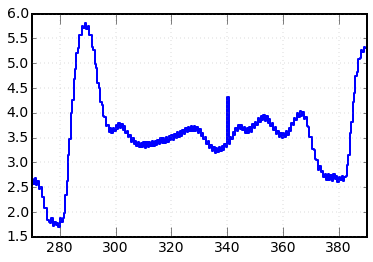

In [19]:
jplot.unfilledBar(pmt['time_edges'], np.log10(pmt['toa_map'].sum(axis=0))*scale2, 
                 color = 'blue', label = 'SNOplus current 3D PMT')